<a href="https://colab.research.google.com/github/nijatmaharramov/Computer-Vision-Projects/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and dataset

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np
import cv2

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nijatmaharramov","key":"10e48367092ad194d7ad788e619e5db8"}'}

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/prithwirajmitra/covid-face-mask-detection-dataset
License(s): copyright-authors
 76% 158M/207M [00:00<00:00, 503MB/s] 
100% 207M/207M [00:00<00:00, 448MB/s]


In [ ]:
!unzip covid-face-mask-detection-dataset.zip -d covid_mask_dataset

Archive:  covid-face-mask-detection-dataset.zip
  inflating: covid_mask_dataset/New Masks Dataset/Test/Mask/2070.jpg  
  inflating: covid_mask_dataset/New Masks Dataset/Test/Mask/2072.jpg  
  inflating: covid_mask_dataset/New Masks Dataset/Test/Mask/2083.jpg  
  inflating: covid_mask_dataset/New Masks Dataset/Test/Mask/2085.jpg  
  inflating: covid_mask_dataset/New Masks Dataset/Test/Mask/2086.jpg  
  inflating: covid_mask_dataset/New Masks Dataset/Test/Mask/2110.jpg  
  inflating: covid_mask_dataset/New Masks Dataset/Test/Mask/2113.jpg  
  inflating: covid_mask_dataset/New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: covid_mask_dataset/New Masks Dataset/Test/Mask/2130.jpg  
  inflating: covid_mask_dataset/New Masks Dataset/Test/Mask/2132.jpg  
  inflating: covid_mask_dataset/New Masks Dataset/Test/Mask/2135.jpg  
  inflating: covid_mask_dataset/New Masks Dataset/Test/Mask/2154.png  
  inflating: covid_mask_dataset/New Masks Dataset/Test/Mask/2158.png  
  inflating: covid_mask_data

In [ ]:
# taking a look at the content and how many files are in them

for dirpath, dirnames, filenames in os.walk("/content/covid_mask_dataset"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}" )

# Function to see random images

In [ ]:
def view_image(target_dir, target_class):
    target_folder = target_dir + '/' + target_class
    random_image = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder + "/"+ random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")

    return img

image shape (275, 183, 3)


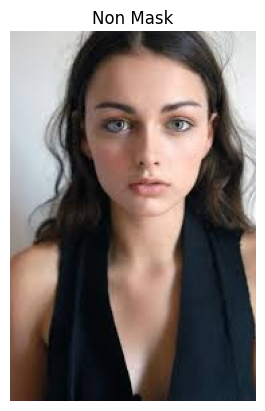

In [ ]:
view_image('/content/covid_mask_dataset/New Masks Dataset/Train', 'Non Mask');

image shape (1000, 700, 3)


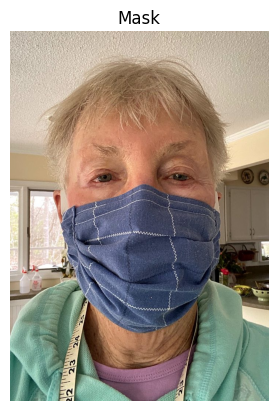

In [ ]:
view_image('/content/covid_mask_dataset/New Masks Dataset/Train', 'Mask');

# Preprocessing steps

In [ ]:
data = []
labels = []

no_mask = os.listdir('/content/covid_mask_dataset/New Masks Dataset/Train/Non Mask/')
for a in no_mask:
    image = cv2.imread('/content/covid_mask_dataset/New Masks Dataset/Train/Non Mask/' + a)
    image = cv2.resize(image,(224,224))
    data.append(image)
    labels.append(0)

no_mask = os.listdir('/content/covid_mask_dataset/New Masks Dataset/Test/Non Mask/')
for a in no_mask:
    image = cv2.imread('/content/covid_mask_dataset/New Masks Dataset/Test/Non Mask/' + a)
    image = cv2.resize(image,(224,224))
    data.append(image)
    labels.append(0)

no_mask = os.listdir('/content/covid_mask_dataset/New Masks Dataset/Validation/Non Mask/')
for a in no_mask:
    image = cv2.imread('/content/covid_mask_dataset/New Masks Dataset/Validation/Non Mask/' + a)
    image = cv2.resize(image,(224,224))
    data.append(image)
    labels.append(0)

In [ ]:
mask = os.listdir('/content/covid_mask_dataset/New Masks Dataset/Train/Mask/')
for a in mask:
    image = cv2.imread('/content/covid_mask_dataset/New Masks Dataset/Train/Mask/' + a)
    image = cv2.resize(image,(224,224))
    data.append(image)
    labels.append(1)

mask = os.listdir('/content/covid_mask_dataset/New Masks Dataset/Test/Mask/')
for a in mask:
    image = cv2.imread('/content/covid_mask_dataset/New Masks Dataset/Test/Mask/' + a)
    image = cv2.resize(image,(224,224))
    data.append(image)
    labels.append(1)

mask = os.listdir('/content/covid_mask_dataset/New Masks Dataset/Validation/Mask/')
for a in mask:
    image = cv2.imread('/content/covid_mask_dataset/New Masks Dataset/Validation/Mask/' + a)
    image = cv2.resize(image,(224,224))
    data.append(image)
    labels.append(1)

In [ ]:
data = np.array(data) / 255
labels = np.array(labels)

In [ ]:
data.shape

(1006, 224, 224, 3)

In [ ]:
labels.shape

(1006,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.1, random_state = 42, stratify = labels)

# Creating my Own model (Model1)

In [ ]:
# model1 = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(224, 224, 3)),
#     tf.keras.layers.Conv2D(64, kernel_size = 3, strides = 2, padding = 'same', activation = 'relu', kernel_initializer = 'he_normal'),
#     tf.keras.layers.MaxPool2D(),
#     tf.keras.layers.Conv2D(128, kernel_size = 3, padding = 'same', activation = 'relu', kernel_initializer = 'he_normal'),
#     tf.keras.layers.Conv2D(128, kernel_size = 3, padding = 'same', activation = 'relu', kernel_initializer = 'he_normal'),
#     tf.keras.layers.MaxPool2D(),
#     tf.keras.layers.Conv2D(256, kernel_size = 3, padding = 'same', activation = 'relu', kernel_initializer = 'he_normal'),
#     tf.keras.layers.Conv2D(256, kernel_size = 3, padding = 'same', activation = 'relu', kernel_initializer = 'he_normal'),
#     tf.keras.layers.MaxPool2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation = 'relu', kernel_initializer = 'he_normal'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(128, activation = 'relu', kernel_initializer = 'he_normal'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(64, activation = 'relu', kernel_initializer = 'he_normal'),
#     tf.keras.layers.Dense(1, activation = 'sigmoid')

# ])

In [ ]:
# model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 112, 112, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,995,009 (53.39 MB)

 Trainable params: 13,995,009 (53.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model1.compile(loss='binary_crossentropy',
#                optimizer = 'SGD',
#                metrics=['accuracy'])

# history1 = model1.fit(X_train, y_train, epochs = 20, validation_split=0.1)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 445ms/step - accuracy: 0.5392 - loss: 0.8567 - val_accuracy: 0.8462 - val_loss: 0.5774
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.7252 - loss: 0.5940 - val_accuracy: 0.7802 - val_loss: 0.4647
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8227 - loss: 0.4516 - val_accuracy: 0.8681 - val_loss: 0.3644
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8377 - loss: 0.3880 - val_accuracy: 0.9341 - val_loss: 0.2556
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8852 - loss: 0.2922 - val_accuracy: 0.7692 - val_loss: 0.4216
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8734 - loss: 0.3294 - val_accuracy: 0.9341 - val_loss: 0.1881
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9024 - loss: 0.2551 - val_accuracy: 0.8901 - val_loss: 0.2356
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8660 - loss: 0.3154 - val_accuracy: 0.8571 -

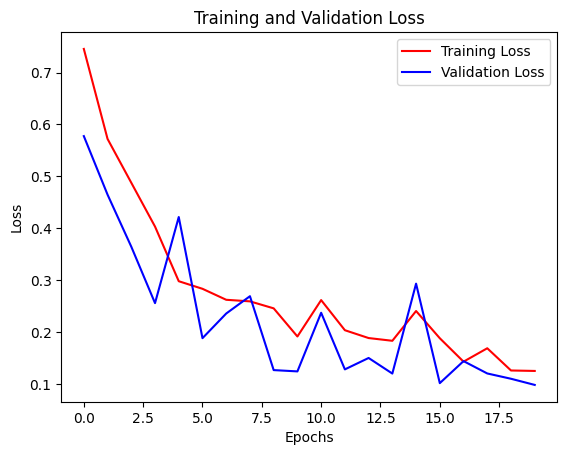

In [ ]:
# train_loss = history1.history['loss']
# val_loss = history1.history['val_loss']
# epochs = range(len(train_loss))

# plt.plot(epochs, train_loss, 'r', label = 'Training Loss')
# plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

Let's check with nesterov + momentum if there is any improvement

In [ ]:
# model1.compile(loss='binary_crossentropy',
#                optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
#                metrics=['accuracy'])

# history1 = model1.fit(X_train, y_train, epochs = 20, validation_split=0.1)

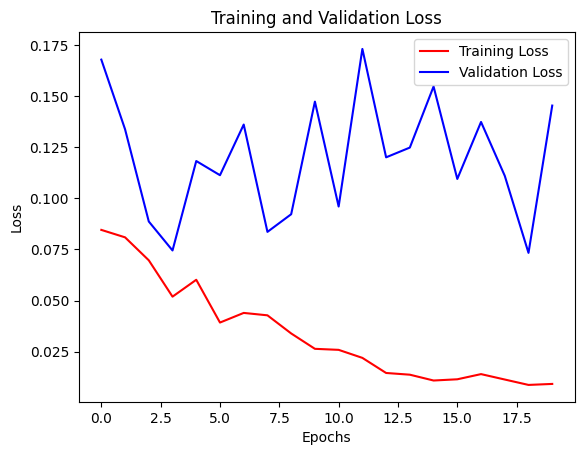

In [ ]:
# train_loss = history1.history['loss']
# val_loss = history1.history['val_loss']
# epochs = range(len(train_loss))

# plt.plot(epochs, train_loss, 'r', label = 'Training Loss')
# plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

We see there can be slight overfitting from the image above. Lets add regularizer to our dense layers and decrease our learning rate to 0.0005.

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2),
])

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),

    data_augmentation,

    tf.keras.layers.Conv2D(64, kernel_size = 3, strides = 2, padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(128, kernel_size = 3, padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(128, kernel_size = 3, padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(256, kernel_size = 3, padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(256, kernel_size = 3, padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation = 'relu', kernel_initializer = 'he_normal',  kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation = 'relu', kernel_initializer = 'he_normal',  kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation = 'relu', kernel_initializer = 'he_normal',  kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

In [ ]:
early_stopping =tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

model1.compile(loss='binary_crossentropy',
               optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, momentum=0.9, nesterov=True),
               metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs = 50, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - accuracy: 0.6202 - loss: 3.2528 - val_accuracy: 0.5934 - val_loss: 3.2015
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.8205 - loss: 3.0141 - val_accuracy: 0.6923 - val_loss: 3.1530
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.8555 - loss: 2.9183 - val_accuracy: 0.7363 - val_loss: 3.1031
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.8673 - loss: 2.8986 - val_accuracy: 0.6923 - val_loss: 3.1228
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.8898 - loss: 2.8101 - val_accuracy: 0.7912 - val_loss: 2.9987
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.9200 - loss: 2.7780 - val_accuracy: 0.8352 - val_loss: 2.9868
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9273 - loss: 2.7577 - val_accuracy: 0.8132 - val_loss: 3.0577
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9380 - loss: 2.7363 - val_accuracy: 0

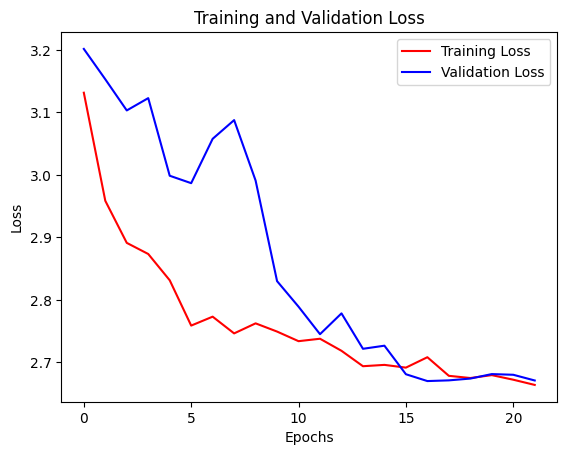

In [ ]:
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(train_loss))

plt.plot(epochs, train_loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

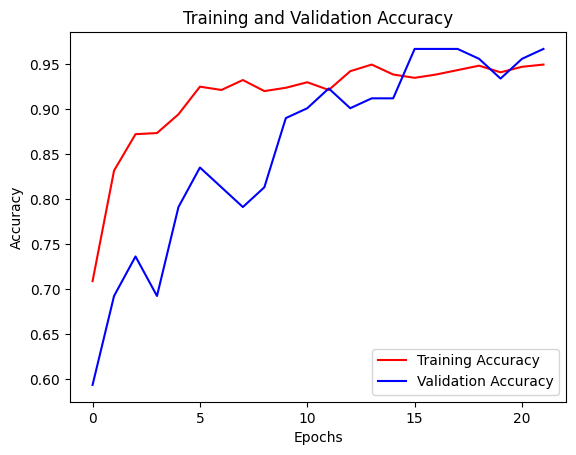

In [ ]:
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model1.evaluate(X_train, y_train)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9612 - loss: 2.6428


[2.643324613571167, 0.9613259434700012]

In [ ]:
model1.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9450 - loss: 2.6498


[2.6575634479522705, 0.9405940771102905]


# Transfer Learning with MobileNet (Model2)

In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

base_model.trainable = False

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2),
])

inputs = tf.keras.layers.Input(shape = (224, 224, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units=128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units=64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units=32, activation="relu")(x)
output = tf.keras.layers.Dense(units=1, activation="sigmoid")(x)

model2 = tf.keras.Model(inputs = inputs, outputs = output)
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.001, nesterov=True, momentum=0.9),loss='binary_crossentropy',metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs = 20, validation_split=0.1)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.8182 - loss: 0.3888 - val_accuracy: 0.9890 - val_loss: 0.0401
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9786 - loss: 0.0777 - val_accuracy: 0.9890 - val_loss: 0.0260
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9862 - loss: 0.0392 - val_accuracy: 0.9890 - val_loss: 0.0297
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9895 - loss: 0.0288 - val_accuracy: 0.9890 - val_loss: 0.0247
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9969 - loss: 0.0232 - val_accuracy: 0.9890 - val_loss: 0.0270
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9921 - loss: 0.0238 - val_accuracy: 0.9890 - val_loss: 0.0417
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9874 - loss: 0.0229 - val_accuracy: 0.9890 - val_loss: 0.0365
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accura

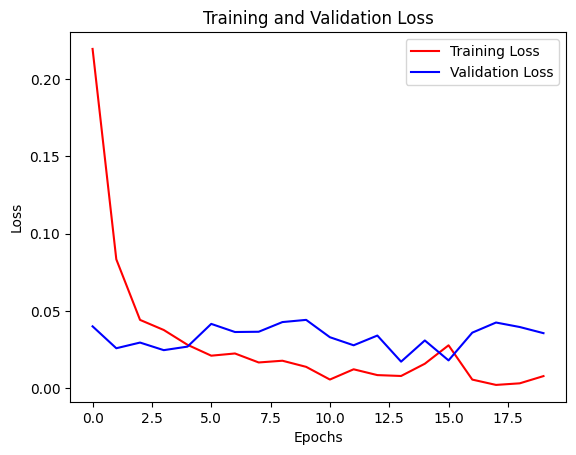

In [ ]:
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(train_loss))

plt.plot(epochs, train_loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

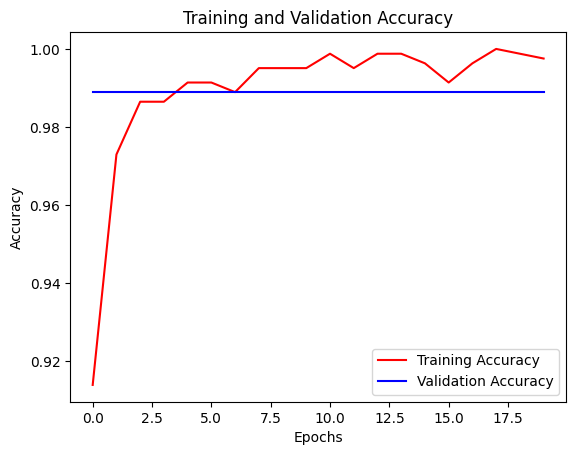

In [ ]:
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model2.evaluate(X_train, y_train)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9999 - loss: 9.7357e-04


[0.004256854765117168, 0.9988950490951538]

In [ ]:
model2.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9848 - loss: 0.0540


[0.06490781903266907, 0.9801980257034302]

In [ ]:
predictions = model2.predict(X_test)
predict = []

for i in range(len(predictions)):
    if predictions[i][0] > 0.5:
        predict.append(1)
    else:
        predict.append(0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predict), columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,50,1
Actual Positive,1,49


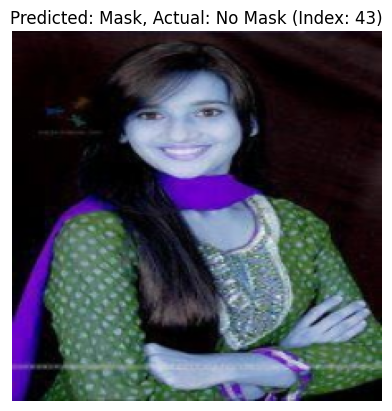

In [ ]:
misclassified_indices = [i for i in range(len(predict)) if predict[i] == 1 and y_test[i] == 0]
display_indices = misclassified_indices[:5]

if display_indices:
    for i in display_indices:
        plt.imshow(X_test[i])
        plt.title(f"Predicted: Mask, Actual: No Mask (Index: {i})")
        plt.axis("off")
        plt.show()
else:
    print("No images were misclassified as positive.")

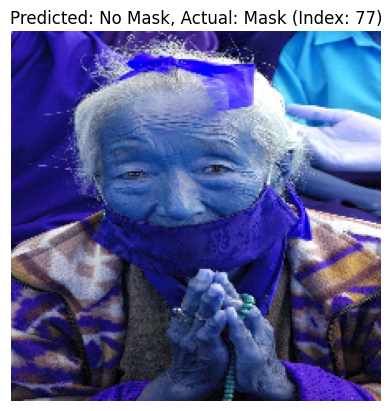

In [ ]:
misclassified_indices = [i for i in range(len(predict)) if predict[i] == 0 and y_test[i] == 1]
display_indices = misclassified_indices[:5]

if display_indices:
    for i in display_indices:
        plt.imshow(X_test[i])
        plt.title(f"Predicted: No Mask, Actual: Mask (Index: {i})")
        plt.axis("off")
        plt.show()
else:
    print("No images were misclassified as negative.")

In [ ]:
model2.save('MobileNet_model.keras')

# Building ResNet50 from scratch (Model3)

In [ ]:
#augmentation to use inside our resnet50model
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2),
])

In [ ]:
def conv_block(x, filters, stride=2):
    f1, f2, f3 = filters

    shortcut = tf.keras.layers.Conv2D(filters=f3, kernel_size=1, strides=stride)(x)
    shortcut = tf.keras.layers.BatchNormalization()(shortcut)

    x = tf.keras.layers.Conv2D(f1, kernel_size=1, strides=stride)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(f2, kernel_size=3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(f3, kernel_size=1)(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    return x

def identity_block(x, filters):
    f1, f2, f3 = filters
    shortcut = x

    x = tf.keras.layers.Conv2D(f1, kernel_size=1)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(f2, kernel_size=3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(f3, kernel_size=1)(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    return x

def ResNet50(input_shape=(224,224,3), num_classes=1):
    inputs = tf.keras.layers.Input(shape = input_shape)

    x = data_augmentation(inputs)

    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    #conv2_x
    x = conv_block(x, filters=[64, 64, 256], stride=1)
    x = identity_block(x, filters=[64, 64, 256])
    x = identity_block(x, filters=[64, 64, 256])

    #conv3_x
    x = conv_block(x, filters=[128, 128, 512])
    x = identity_block(x, filters=[128, 128, 512])
    x = identity_block(x, filters=[128, 128, 512])
    x = identity_block(x, filters=[128, 128, 512])

    #conv4_x
    x = conv_block(x, filters=[256, 256, 1024])
    x = identity_block(x, filters=[256, 256, 1024])
    x = identity_block(x, filters=[256, 256, 1024])
    x = identity_block(x, filters=[256, 256, 1024])
    x = identity_block(x, filters=[256, 256, 1024])
    x = identity_block(x, filters=[256, 256, 1024])

    #conv5_x
    x = conv_block(x, filters=[512, 512, 2048])
    x = identity_block(x, filters=[512, 512, 2048])
    x = identity_block(x, filters=[512, 512, 2048])

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


In [ ]:
model3 = ResNet50(input_shape=(224,224,3), num_classes=1)

model3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.001, nesterov=True, momentum=0.9),
               loss='binary_crossentropy',
               metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, epochs = 30, validation_split=0.1)

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 689ms/step - accuracy: 0.5135 - loss: 0.7263 - val_accuracy: 0.4945 - val_loss: 0.6930
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 526ms/step - accuracy: 0.5786 - loss: 0.6449 - val_accuracy: 0.4725 - val_loss: 0.6991
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 510ms/step - accuracy: 0.7022 - loss: 0.5905 - val_accuracy: 0.5385 - val_loss: 0.6775
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 509ms/step - accuracy: 0.6956 - loss: 0.5949 - val_accuracy: 0.4835 - val_loss: 0.6952
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 523ms/step - accuracy: 0.7357 - loss: 0.5160 - val_accuracy: 0.4725 - val_loss: 0.7176
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 515ms/step - accuracy: 0.8015 - loss: 0.4462 - val_accuracy: 0.5385 - val_loss: 0.6540
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 521ms/step - accuracy: 0.8047 - loss: 0.4378 - val_accuracy: 0.6484 - val_loss: 0.6048
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 512ms/step - accuracy: 0.8240 - loss: 0.4132 - val_accu

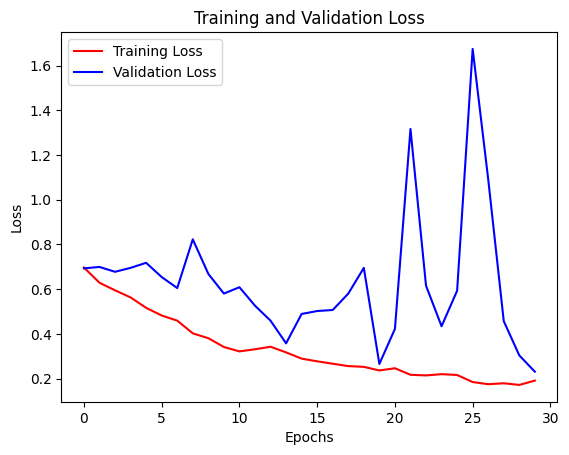

In [ ]:
train_loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(train_loss))

plt.plot(epochs, train_loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

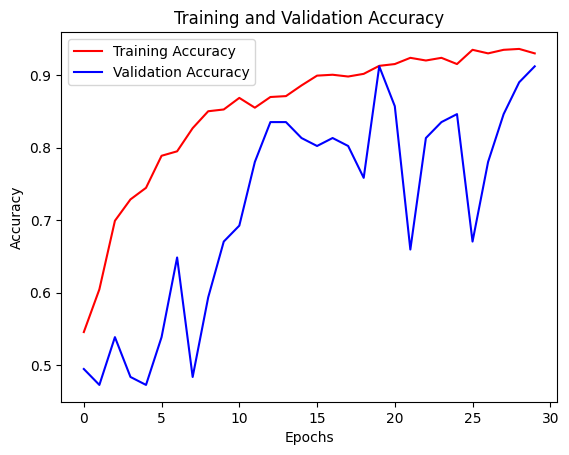

In [ ]:
train_acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model3.evaluate(X_train, y_train)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.9540 - loss: 0.1476


[0.16126814484596252, 0.9458563327789307]

In [ ]:
model3.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.8866 - loss: 0.4587


[0.42411813139915466, 0.8910890817642212]

# Real time prediction from camera

In [ ]:
# @title
%config Completer.use_jedi = False

In [ ]:
# @title
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
mask_detection = tf.keras.models.load_model('MobileNet_model.keras')

In [ ]:
# @title
text_mask = "Mask On"
text_no_mask = "Mask Off"
font = cv2.FONT_HERSHEY_SIMPLEX
scale = 0.8

In [ ]:
# @title
def predict(image):

    face_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    face_frame = cv2.resize(face_frame, (224, 224))
    face_frame = tf.keras.preprocessing.image.img_to_array(face_frame)
    face_frame = np.expand_dims(face_frame, axis=0)
    face_frame =  tf.keras.applications.mobilenet_v2.preprocess_input(face_frame)
    prediction = mask_detection.predict(face_frame)

    return prediction[0][0]

In [ ]:
# @title
def detector(gray_image, frame):

    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5)

    for (x,y,w,h) in faces:

        roi_color = frame[y:y+h, x:x+w]
        mask = predict(roi_color)


        if mask > 0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(frame, text =text_mask, org =(x+50,y-100), fontFace =font, fontScale = scale, color =(0,255,0),
            thickness = 2)

        elif mask<=0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2)
            cv2.putText(frame, text =text_no_mask, org =(x+50,y-100), fontFace =font, fontScale = scale , color =(0,0,255),
            thickness = 2)

    return frame

In [ ]:
# @title
video_cap = cv2.VideoCapture(0)

while True:

    ret, frame = video_cap.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    detect = detector(gray_frame, frame)
    cv2.imshow("Video", detect)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_cap.release()
cv2.destroyAllWindows()